In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("laptop_price.csv", encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df = df.drop("Product", axis=1)
df = df.drop("laptop_ID", axis=1)

In [4]:
# One-hot-encoding the Company column
df = df.join(pd.get_dummies(df.Company, dtype=int))
df = df.drop("Company", axis=1)

In [5]:
# One-hot-encoding the TypeName column
df = df.join(pd.get_dummies(df.TypeName, dtype=int))
df = df.drop("TypeName", axis=1)

In [6]:
# Getting only the resolution in ScreenResolution column
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])
df = df.drop("ScreenResolution", axis=1)

In [7]:
# Getting only the cpu brand and frequency in Cpu column
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]
df = df.drop("Cpu", axis=1)

In [8]:
# Getting only the ram value in Ram column
df["Ram"] = df["Ram"].str[:-2]

In [9]:
# Type casting the values
df["Ram"] = df["Ram"].astype(int)
df["CPU Frequency"] = df["CPU Frequency"].astype(float)
df["Screen Width"] = df["Screen Width"].astype(int)
df["Screen Height"] = df["Screen Height"].astype(int)

In [10]:
# Getting the hard disk amount and hard disk type
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [11]:
def turn_memory_into_mb(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [12]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_mb)

In [13]:
df = df.drop("Memory", axis=1)

In [14]:
# Keeping only weight value
df["Weight"] = df["Weight"].str[:-2]
df["Weight"] = df["Weight"].astype(float)

In [15]:
# Getting only gpu brand
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)

In [16]:
# One-hot-encoding the OpSys column
df = df.join(pd.get_dummies(df.OpSys, dtype=int))
df = df.drop("OpSys", axis=1)

In [17]:
# One-hot-encoding the cpu brand
cpu_categories = pd.get_dummies(df["CPU Brand"], dtype=int)
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [18]:
# One-hot-encoding the gpu brand
gpu_categories = pd.get_dummies(df["GPU Brand"], dtype=int)
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [19]:
# One-hot-encoding the memory type
# One-hot-encoding the cpu brand
memory_categories = pd.get_dummies(df["Memory Type"], dtype=int)
memory_categories.columns = [col + "_Memory" for col in memory_categories.columns]

df = df.join(memory_categories)
df = df.drop("Memory Type", axis=1)

In [23]:
df.corr()

,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash_Memory,HDD_Memory,Hybrid_Memory,SSD_Memory
Inches,1.000000,0.237993,0.827631,0.068197,0.009435,-0.158850,0.112766,-0.017426,0.045288,0.019637,...,-0.122000,-0.052816,0.207023,-0.052816,-0.592264,0.486561,-0.367908,0.271145,0.026080,-0.082325
Ram,0.237993,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,-0.016214,...,0.107051,-0.023894,-0.093119,-0.023894,-0.319551,0.415464,-0.192327,-0.318614,-0.016994,0.398663
Weight,0.827631,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,0.014053,...,-0.057386,-0.037026,0.106519,-0.037026,-0.596378,0.565232,-0.259337,0.166644,0.030970,-0.037134
Price_euros,0.068197,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,-0.027135,...,0.181127,-0.018431,-0.199415,-0.018431,-0.184205,0.348797,-0.210823,-0.426121,-0.039386,0.513609
Acer,0.009435,-0.138432,0.056444,-0.208349,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,-0.014074,...,-0.066566,-0.008119,-0.034859,-0.008119,0.005305,0.020848,0.086359,0.109048,-0.025765,-0.140685
Apple,-0.158850,0.023950,-0.138191,0.080688,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,-0.006148,...,0.028849,-0.003547,0.001749,-0.003547,0.078028,-0.085183,0.230044,-0.081359,-0.011256,-0.032982
Asus,0.112766,0.088634,0.101332,-0.010376,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,-0.017845,...,-0.036835,-0.010295,-0.073770,-0.010295,-0.106654,0.170742,0.049519,-0.007644,-0.032668,-0.010926
Chuwi,-0.017426,-0.035117,-0.022536,-0.055646,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,-0.002308,...,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972,0.194383,-0.030537,-0.004225,-0.065032
Dell,0.045288,0.082241,0.088465,0.048509,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,-0.026102,...,0.122473,-0.015058,0.190722,-0.015058,-0.075707,-0.060187,-0.118570,0.046568,-0.005856,0.014739
Fujitsu,0.019637,-0.016214,0.014053,-0.027135,-0.014074,-0.006148,-0.017845,-0.002308,-0.026102,1.000000,...,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972,-0.011872,0.004832,-0.004225,0.001980


<Axes: >

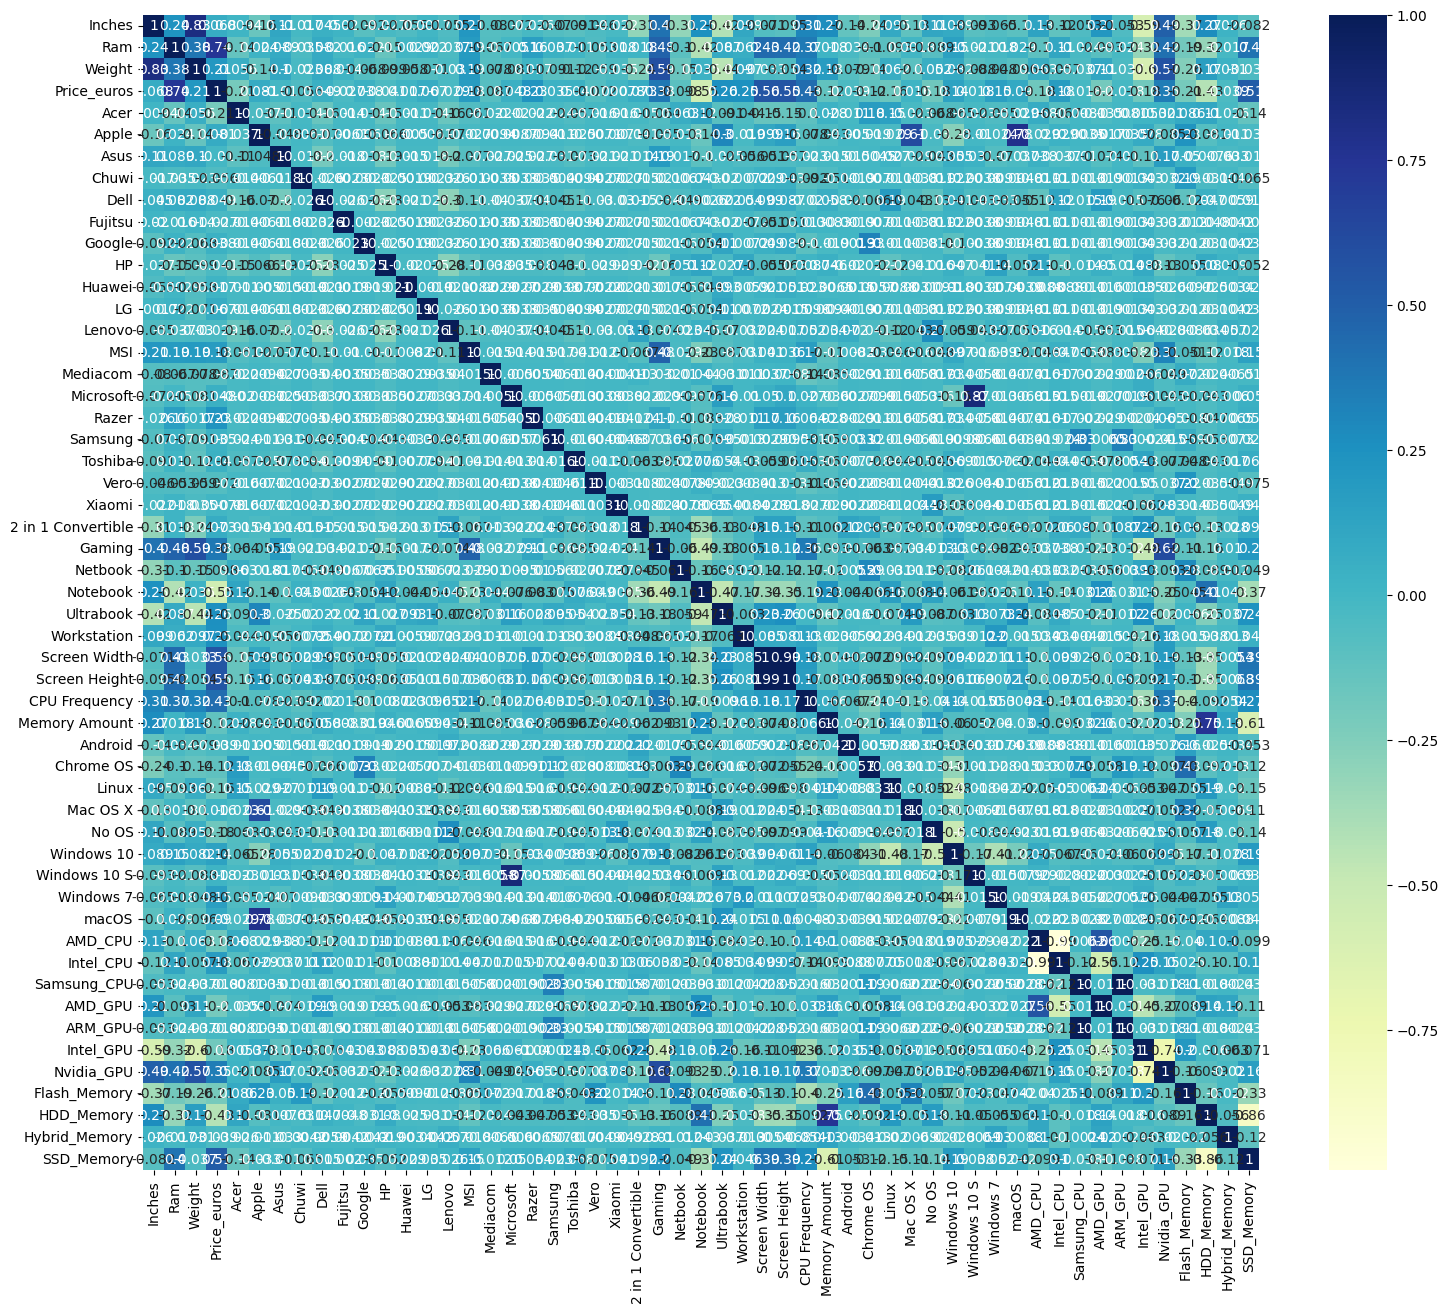

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [26]:
target_corr = df.corr()["Price_euros"].apply(abs).sort_values()
target_corr

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Hybrid_Memory         0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [28]:
# selecting the most relevant 20 features
selected_features = target_corr[-21:].index
selected_features = list(selected_features)
selected_features

['MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Flash_Memory',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'HDD_Memory',
 'CPU Frequency',
 'SSD_Memory',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [29]:
# creating a dataframe with the most relevant features
limited_df = df[selected_features]
limited_df.head()

,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,Flash_Memory,Razer,Workstation,...,Nvidia_GPU,Gaming,HDD_Memory,CPU Frequency,SSD_Memory,Notebook,Screen Height,Screen Width,Ram,Price_euros
0,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,2.3,1,0,1600,2560,8,1339.69
1,0,0,1,1,0,0,1.34,1,0,0,...,0,0,0,1.8,0,0,900,1440,8,898.94
2,0,0,1,1,0,0,1.86,0,0,0,...,0,0,0,2.5,1,1,1080,1920,8,575.00
3,0,0,1,0,1,0,1.83,0,0,0,...,0,0,0,2.7,1,0,1800,2880,16,2537.45
4,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,3.1,1,0,1600,2560,8,1803.60


<Axes: >

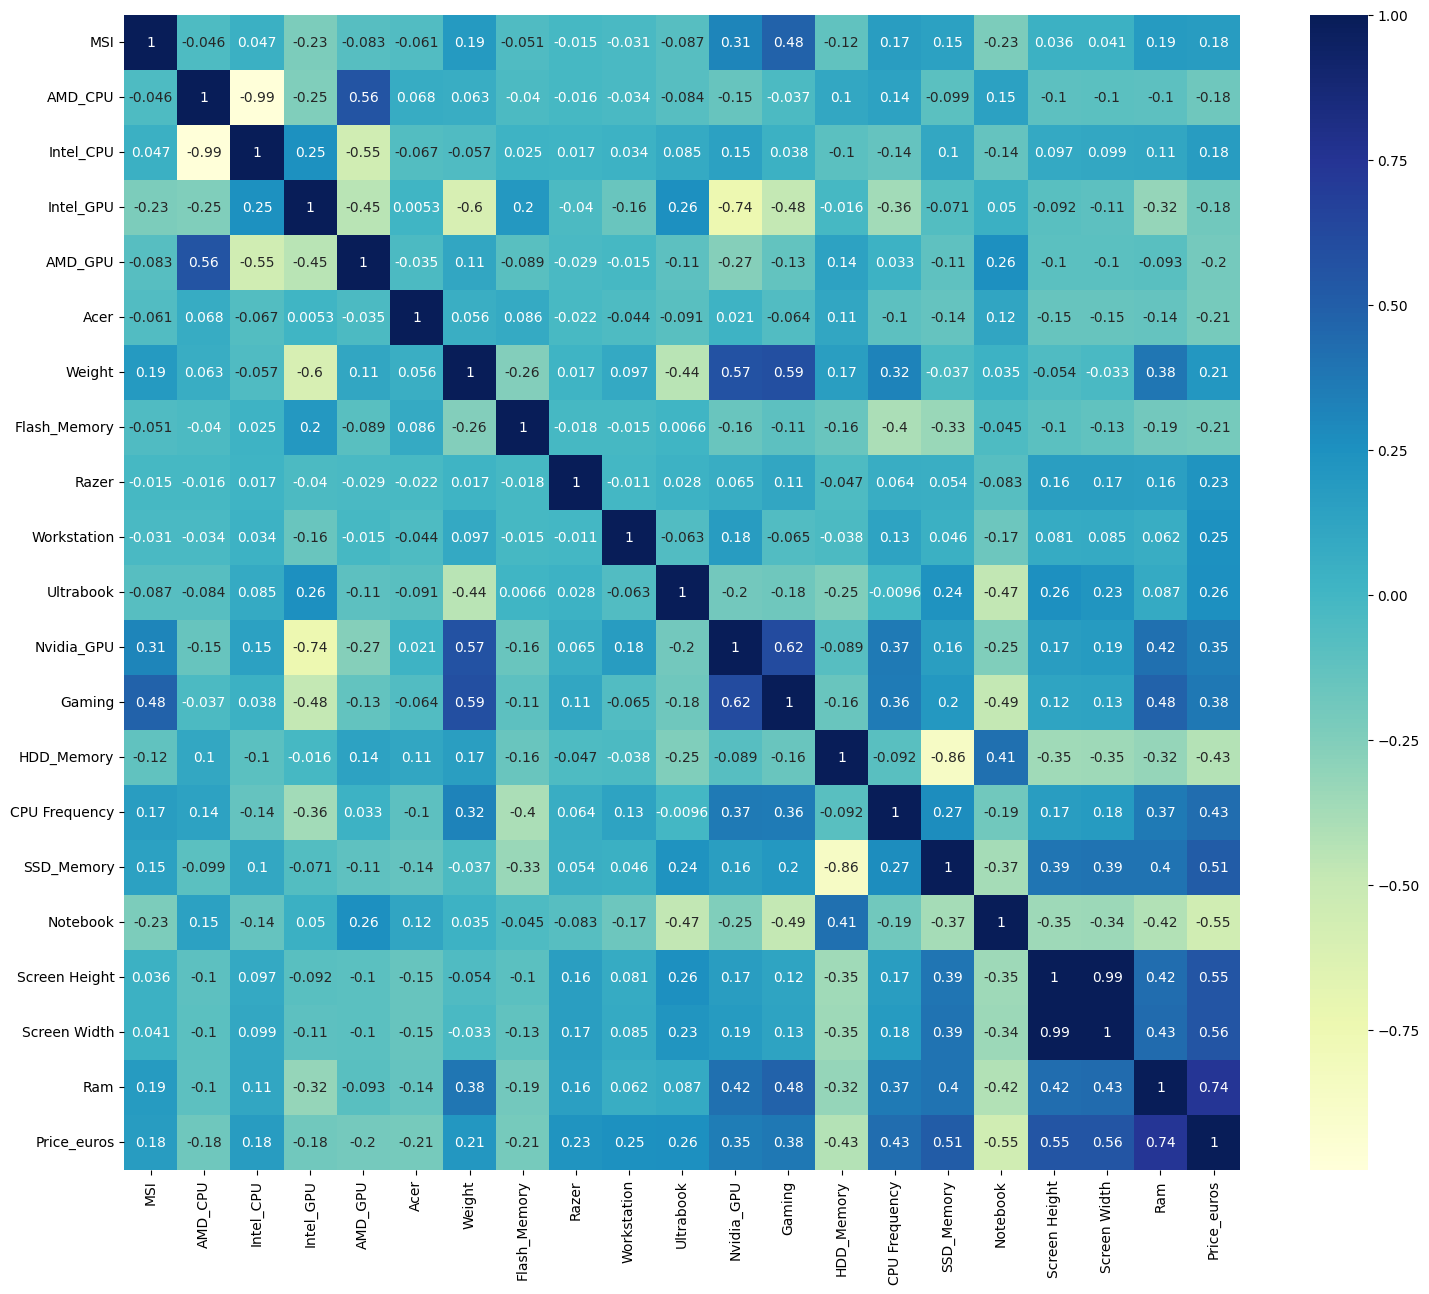

In [30]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# splitting the data
X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [33]:
forest.score(X_test_scaled, y_test)

0.8312756168295186

In [39]:
y_pred = forest.predict(X_test_scaled)

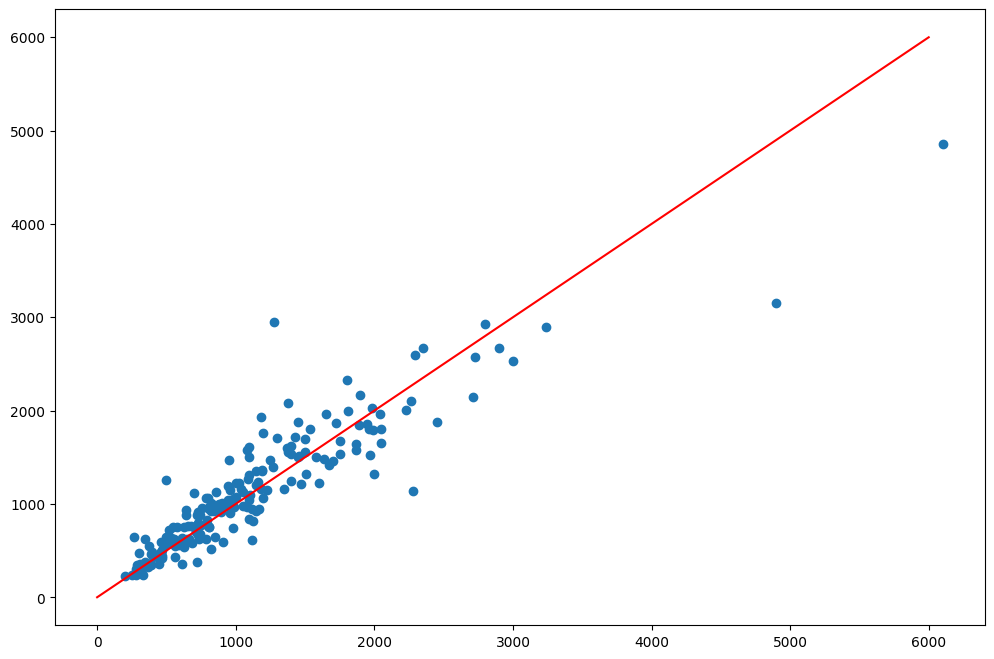

In [41]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.plot(range(0, 6000), range(0, 6000), color="red")

In [48]:
X_test.iloc[0]

MSI                 0.00
AMD_CPU             0.00
Intel_CPU           1.00
Intel_GPU           1.00
AMD_GPU             0.00
Acer                0.00
Weight              1.05
Flash_Memory        0.00
Razer               0.00
Workstation         0.00
Ultrabook           0.00
Nvidia_GPU          0.00
Gaming              0.00
HDD_Memory          0.00
CPU Frequency       2.50
SSD_Memory          1.00
Notebook            1.00
Screen Height    1080.00
Screen Width     1920.00
Ram                 8.00
Name: 479, dtype: float64